In [1]:
# import nibabel as nib
# from google.colab import files

# # Upload a .nii.gz file
# uploaded = files.upload()

# # Extract the file name from the uploaded dictionary
# file_name = list(uploaded.keys())[0]

# # Load the NIfTI file using nibabel
# nii_img = nib.load(file_name)

# # Get the image data as a NumPy array
# img_data = nii_img.get_fdata()

# # Print the shape (Z, Y, X)
# print("Volume Shape:", img_data.shape)

In [2]:
# import nibabel as nib
# from google.colab import files

# # Upload a .nii.gz file
# uploaded = files.upload()

# # Extract the file name from the uploaded dictionary
# file_name = list(uploaded.keys())[0]

# # Load the NIfTI file using nibabel
# nii_img = nib.load(file_name)

# # Get the image data as a NumPy array
# img_data = nii_img.get_fdata()

# # Print the shape (Z, Y, X)
# print("Volume Shape:", img_data.shape)

In [3]:
# import tensorflow as tf

# device_name = tf.config.list_physical_devices('GPU')

# if not device_name:
#     raise SystemError('GPU device not found')

# print(f'Found GPU at: {device_name}')

In [4]:
# from google.colab import drive

# drive.mount('/content/drive')

In [5]:
# # Uninstall old or conflicting versions
# %pip uninstall numpy tensorflow keras scikit-image patchify matplotlib scikit-learn nibabel segmentation-models-3D classification-models-3D efficientnet-3D -y

In [6]:
# # Install fixed versions only
# %pip install numpy==1.24.4 
# %pip install tensorflow==2.13.0 
# %pip install keras==2.13.1 
# %pip install scikit-image==0.21.0
# %pip install patchify==0.2.3 
# %pip install matplotlib==3.7.1 
# %pip install scikit-learn==1.3.0 
# %pip install nibabel==5.1.0 
# %pip install segmentation-models-3D==1.0.4 
# %pip install classification-models-3D==1.0.2 
# %pip install efficientnet-3D==1.0.0


In [7]:
import numpy
import tensorflow
import keras
import skimage
import patchify
import matplotlib
import sklearn
import nibabel
import segmentation_models_3D
import classification_models_3D
import efficientnet_3D

print("numpy:", numpy.__version__)
print("tensorflow:", tensorflow.__version__)
print("keras:", keras.__version__)
print("scikit-image:", skimage.__version__)
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("nibabel:", nibabel.__version__)
print("segmentation-models-3D:", segmentation_models_3D.__version__)
print("classification-models-3D:", classification_models_3D.__version__)
print("efficientnet-3D:", efficientnet_3D.__version__)


Segmentation Models: using `tf.keras` framework.
numpy: 1.24.3
tensorflow: 2.13.0
keras: 2.13.1
scikit-image: 0.21.0
matplotlib: 3.7.1
scikit-learn: 1.3.0
nibabel: 5.1.0
segmentation-models-3D: 1.0.4
classification-models-3D: 1.0.0
efficientnet-3D: 1.0.0


In [8]:
# %pip install classification-models-3D
# %pip install efficientnet-3D
# %pip install segmentation-models-3D
# %pip install patchify

In [9]:
import segmentation_models_3D as sm

In [10]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import nibabel as nib

In [11]:
import nibabel as nib
import numpy as np
from patchify import patchify
import math

# Load the .nii.gz image and mask
image_nifti = nib.load('./Data_Subset/images/ct_1003_image.nii.gz')
mask_nifti = nib.load('./Data_Subset/labels/ct_1003_label.nii.gz')

# Convert to NumPy arrays
image = np.array(image_nifti.get_fdata(), dtype=np.float32)
mask = np.array(mask_nifti.get_fdata(), dtype=np.uint8)  # Assuming binary mask

# Get original dimensions
H, W, D = image.shape  # Shape = (Height, Width, Depth)
print(f"Original Image Shape: {image.shape}")

# Compute new depth (nearest multiple of 64)
new_depth = math.ceil(D / 64) * 64
depth_padding = new_depth - D

# Pad depth dimension with zeros (only in the last axis)
image_padded = np.pad(image, ((0, 0), (0, 0), (0, depth_padding)), mode='constant', constant_values=0)
mask_padded = np.pad(mask, ((0, 0), (0, 0), (0, depth_padding)), mode='constant', constant_values=0)

print(f"Padded Image Shape: {image_padded.shape}")

# Extract 3D patches of (64, 64, 64) with step size 64
image_patches = patchify(image_padded, (64, 64, 64), step=64)
mask_patches = patchify(mask_padded, (64, 64, 64), step=64)

print(f"Image patches shape before reshaping: {image_patches.shape}")
print(f"Mask patches shape before reshaping: {mask_patches.shape}")

# Reshape patches for training
image_patches = image_patches.reshape(-1, 64, 64, 64)  # Convert to (N, 64, 64, 64)
mask_patches = mask_patches.reshape(-1, 64, 64, 64)

# Add channel dimension (1 for grayscale images)
image_patches = image_patches[:, np.newaxis, :, :, :]  # Shape: (N, 1, 64, 64, 64)
mask_patches = mask_patches[:, np.newaxis, :, :, :]

print(f"Final Image Patches Shape: {image_patches.shape}")  # (N, 1, 64, 64, 64)
print(f"Final Mask Patches Shape: {mask_patches.shape}")  # (N, 1, 64, 64, 64)

# Total patches count
print(f"Total Image Patches: {image_patches.shape[0]}")
print(f"Total Mask Patches: {mask_patches.shape[0]}")


Original Image Shape: (512, 512, 206)
Padded Image Shape: (512, 512, 256)
Image patches shape before reshaping: (8, 8, 4, 64, 64, 64)
Mask patches shape before reshaping: (8, 8, 4, 64, 64, 64)
Final Image Patches Shape: (256, 1, 64, 64, 64)
Final Mask Patches Shape: (256, 1, 64, 64, 64)
Total Image Patches: 256
Total Mask Patches: 256


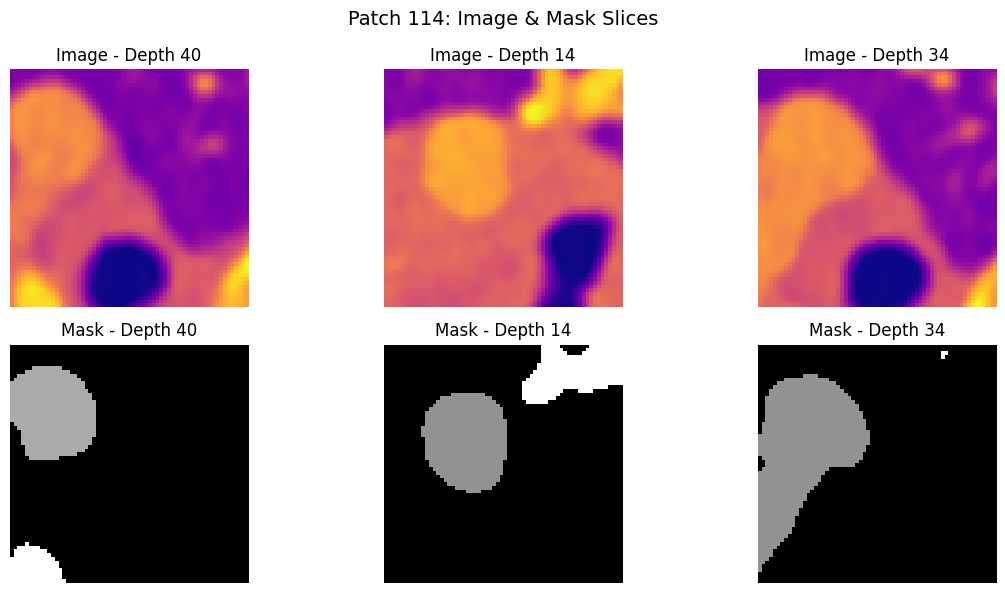

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Select a random patch index
patch_index = 114
sample_patch = image_patches[patch_index, 0]  # Shape: (64, 64, 64)
sample_mask = mask_patches[patch_index, 0]    # Corresponding mask patch

# Randomly select 3 depth slices
depth_slices = np.random.choice(range(64), 3, replace=False)

# Create a 2-row grid (3 columns): Top row (image slices), Bottom row (mask slices)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i in range(3):
    depth = depth_slices[i]

    # Image slice (Top row)
    axes[0, i].imshow(sample_patch[:, :, depth], cmap='plasma')
    axes[0, i].set_title(f"Image - Depth {depth}")
    axes[0, i].axis("off")

    # Mask slice (Bottom row)
    axes[1, i].imshow(sample_mask[:, :, depth], cmap='gray')
    axes[1, i].set_title(f"Mask - Depth {depth}")
    axes[1, i].axis("off")

plt.suptitle(f"Patch {patch_index}: Image & Mask Slices", fontsize=14)
plt.tight_layout()
plt.show()


In [13]:
print(image_patches.shape)
# [patches, channels, height , width, depth]
# 256 patches and 1 grayscale channel , 64 x 64 x 64 - as patch volumen size

(256, 1, 64, 64, 64)


In [14]:
# import numpy as np
# import nibabel as nib

# # Load the label NIfTI file
# mask_nifti = nib.load('/content/drive/MyDrive/Image_CHD/Data_Subset/labels/ct_1001_label.nii.gz')
# label_data = mask_nifti.get_fdata()

# # Identify unique class labels
# unique_classes = np.unique(label_data)
# print(f"Segmentation classes: {unique_classes}")


In [15]:
n_classes = 8

In [16]:
# Convert grayscale images (1 channel) to 3 channels
train_img = np.repeat(image_patches, 3, axis=1)  # Shape: (256, 3, 64, 64, 64)

# One-hot encode masks
train_mask_cat = to_categorical(mask_patches, num_classes=n_classes)  # Shape: (256, 1, 64, 64, 64, 8)

# Remove redundant channel dimension for masks
train_mask_cat = train_mask_cat.squeeze(1)  # New shape: (256, 64, 64, 64, 8)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    train_img, train_mask_cat, test_size=0.10, random_state=0
)

X_train = np.transpose(X_train, (0, 2, 3, 4, 1))  # (230, 64, 64, 64, 3)
X_test = np.transpose(X_test, (0, 2, 3, 4, 1))    # (26, 64, 64, 64, 3)


print("X_train shape:", X_train.shape)  # ✅ (230, 64, 64, 64, 3)
print("y_train shape:", y_train.shape)  # ✅ (230, 64, 64, 64, 8)
print("X_test shape:", X_test.shape)    # ✅ (26, 64, 64, 64, 3)
print("y_test shape:", y_test.shape)    # ✅ (26, 64, 64, 64, 8)


X_train shape: (230, 64, 64, 64, 3)
y_train shape: (230, 64, 64, 64, 8)
X_test shape: (26, 64, 64, 64, 3)
y_test shape: (26, 64, 64, 64, 8)


In [18]:
#Define parameters for our model.

encoder_weights = 'imagenet'
BACKBONE = 'vgg16'  
activation = 'softmax'
patch_size = 64
n_classes = 8
channels = 3

LR = 0.0001
optim = keras.optimizers.Adam(learning_rate = LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# Losses
dice_loss = sm.losses.DiceLoss(class_weights=np.array([1.0]*n_classes))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + focal_loss

# Metrics
metrics = [
    sm.metrics.IOUScore(threshold=0.5),
    sm.metrics.FScore(threshold=0.5)
]

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss



In [19]:
preprocess_input = sm.get_preprocessing(BACKBONE)

In [20]:

#Preprocess input data - otherwise you end up with garbage resutls
# and potentially model that does not converge.
X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

In [21]:
#Define the model. Here we use Unet but we can also use other model architectures from the library.
model = sm.Unet(BACKBONE, classes = n_classes,
                input_shape = (patch_size, patch_size, patch_size, channels),
                encoder_weights = encoder_weights,
                activation = activation)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 64, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv3D)       (None, 64, 64, 64, 64)       5248      ['input_1[0][0]']             
                                                                                                  
 block1_conv2 (Conv3D)       (None, 64, 64, 64, 64)       110656    ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling3D)  (None, 32, 32, 32, 64)       0         ['block1_conv2[0][0]']        
                                                                                              

In [22]:
print(X_test_prep.shape)
print(X_train_prep.shape)

(26, 64, 64, 64, 3)
(230, 64, 64, 64, 3)


In [23]:
#Fit the model
history=model.fit(X_train_prep,
          y_train,
          batch_size = 8,
          epochs = 2,
          verbose = 1,
          validation_data = (X_test_prep, y_test))

Epoch 1/2
29/29 [==============================] - 2920s 101s/step - loss: 0.9824 - iou_score: 0.0034 - f1-score: 0.0064 - val_loss: 0.9892 - val_iou_score: 0.0064 - val_f1-score: 0.0122
Epoch 2/2
29/29 [==============================] - 2841s 98s/step - loss: 0.9280 - iou_score: 0.1637 - f1-score: 0.1816 - val_loss: 0.9446 - val_iou_score: 0.1639 - val_f1-score: 0.1843


In [24]:
#Save model for future use
model.save('./3D_model_vgg16_2epochs.h5')


c:\Users\manvi sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


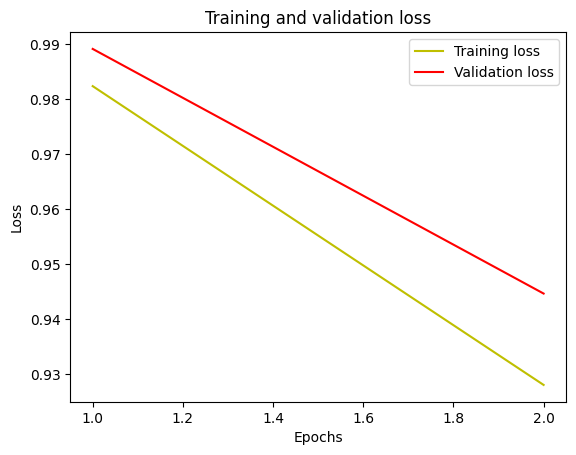

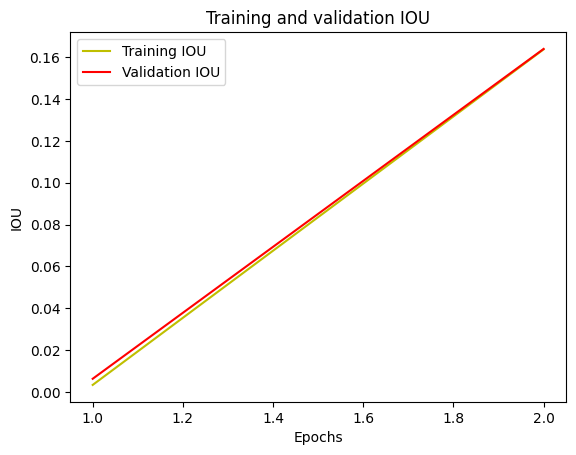

In [25]:
###
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()